# PHYS 404 Homework 4 2/11/2023

# Write a program to numerically evaluate the derivative of f(x)=cos x at an arbitrary position x.
## Question 1: Evaluate the derivative at position x using the forward difference scheme. Plot log(Error)=log10|f’(numerically)-f’(analytic)| against log10(dx) for dx=1e-16,1e-15,….,0.1 at x=π/4. You should find Error~ 𝑑𝑥𝑛; what is n? What is the optimal value for dx.

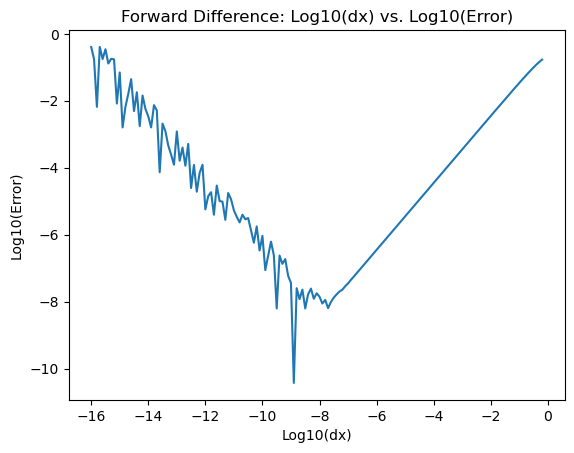

In [63]:
import numpy as np
import matplotlib.pyplot as plt
# Function to evaluate the derivative via forward difference
def forward(y, x, dx):
    return (y(x+dx) - y(x))/dx

# initialize the log(Error) list
dx_arr = []
error_arr = []
# set x to pi/4
x = np.pi / 4
for dx in 10**np.arange(-16, -0.1, 0.1): 
    # calculate error = abs(f'(numberical) - f'(analytic))
    # while we know the derivative of cosx is -sinx
    error = np.abs(forward(np.cos, x, dx) - (-np.sin(x)))
    # push the result to the error list
    error_arr.append(error)
    dx_arr.append(dx)

# Plot the logarithm of the error against the logarithm of the step size
plt.plot(np.log10(dx_arr), np.log10(error_arr))
plt.title('Forward Difference: Log10(dx) vs. Log10(Error)')
plt.xlabel('Log10(dx)')
plt.ylabel('Log10(Error)')
plt.show()


As we notice from the plot, the error value decrease linearly proportional to the infinitesimal step dx. In which according to the plot, n is approximately -1, (e.g., log(dx = -4) correspond to log(error = -4)). And in order to obtain the optimal infinitesimal step dx, we would like roughly 1e-8 because it gave us the least algorithmic error while at the mean time, avoids the truncation error.

## Question 2: Repeat the exercise using the central difference scheme. Why this scheme is better?

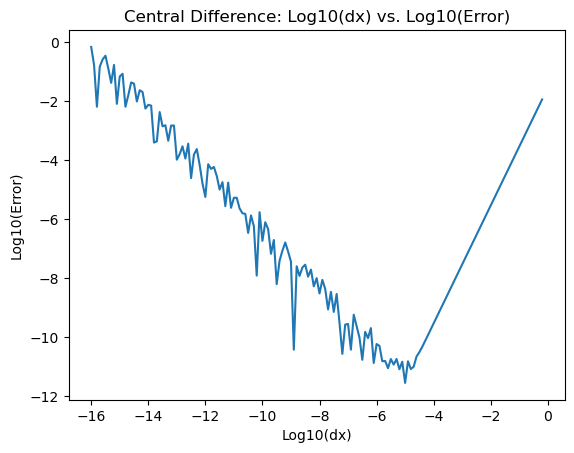

In [64]:
def central(y,x,dx):
    return (y(x+dx/2.)- y(x-dx/2.))/dx

# same content as above except for Central Difference 
# initialize the log(Error) list
dx_arr = []
error_arr = []
# set x to pi/4
x = np.pi / 4
for dx in 10**np.arange(-16, -0.1, 0.1): 
    # calculate error = abs(f'(numberical) - f'(analytic))
    # while we know the derivative of cosx is -sinx
    error = np.abs(central(np.cos, x, dx) - (-np.sin(x)))
    # push the result to the error list
    error_arr.append(error)
    dx_arr.append(dx)

# Plot the logarithm of the error against the logarithm of the step size
plt.plot(np.log10(dx_arr), np.log10(error_arr))
plt.title('Central Difference: Log10(dx) vs. Log10(Error)')
plt.xlabel('Log10(dx)')
plt.ylabel('Log10(Error)')
plt.show()

In this case of central difference analysis, we found that the n is approximately -2 this time, while an optimal dx would be 1e-5.

The reason why central difference scheme is more accurate is because it take account both side of the evaluating point, x + dx/2 and x - dx/2, while the forward difference scheme only worries about one side, that's why forward method has larger discretization error.

## Quesiton 3: Repeat (2) for x=0. Why do the results differ? (hint: write out the error term derived in the class explicitly by plugging the derivative of cos or sin)

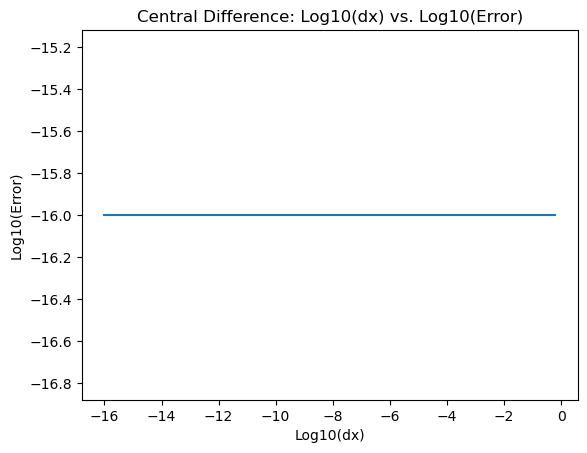

In [75]:
# same content as above except for Central Difference 
# initialize the log(Error) list
dx_arr = []
error_arr = []
# set x to 0
x = 0
for dx in 10**np.arange(-16, -0.1, 0.1): 
    # calculate error = abs(f'(numberical) - f'(analytic))
    # while we know the derivative of cosx is -sinx
    error = np.abs(central(np.cos, x, dx) - (-np.sin(x)))
    # add a small positive constant to the error to avoid log10 of zero or negative
    error = error + 1e-16
    # push the result to the error list
    error_arr.append(error)
    dx_arr.append(dx)

# Plot the logarithm of the error against the logarithm of the step size
plt.plot(np.log10(dx_arr), np.log10(error_arr))
plt.title('Central Difference: Log10(dx) vs. Log10(Error)')
plt.xlabel('Log10(dx)')
plt.ylabel('Log10(Error)')
plt.show()

The plot appears to be a horizontal straight line, indicating the the algorithmic error is not dependent of the infinitesimal step dx. The reason behind this phenonmenon is straightforward, since f'(0) or -sin(0) = 0 regardless of how many terms are expanded, numrical(0) - analytic(0) = 0 - 0, hence, the plot looks kind of bizarre and different than the analysis previously. 